**The dataset captures vehicle repair transactions, primarily focusing on steering wheel-related issues. The core business problem likely revolves around identifying recurring defects in steering wheel components across specific vehicle models and leading to increased Repair cost.**

In [41]:
pip install pandas fuzzywuzzy matplotlib seaborn

**Importing the Data & libraries**

In [42]:
# Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import datetime as dt
# Remove deprecation warnings
import warnings
warnings.filterwarnings('ignore')

In [43]:
import pandas as pd
# File path
file_path = "/content/DA_Task_2.xlsx"
xls = pd.ExcelFile(file_path)
xls.sheet_names


['Sheet1']

In [44]:
# Load the sheet into a DataFrame
df = pd.read_excel(xls, sheet_name="Sheet1")
df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2210881CNJX0287,2808841910,6,1,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,2809979441,4,1,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,R2212982CKJX0282,2808901882,8,1,N,TF10543,1500,10.0,0,1


**Colunm-wise Analysis**

In [45]:
df.columns

Index(['VIN', 'TRANSACTION_ID', 'CORRECTION_VERBATIM', 'CUSTOMER_VERBATIM',
       'REPAIR_DATE', 'CAUSAL_PART_NM', 'GLOBAL_LABOR_CODE_DESCRIPTION',
       'PLATFORM', 'BODY_STYLE', 'VPPC', 'PLANT', 'BUILD_COUNTRY',
       'LAST_KNOWN_DLR_NAME', 'LAST_KNOWN_DLR_CITY', 'REPAIRING_DEALER_CODE',
       'DEALER_NAME', 'REPAIR_DLR_CITY', 'STATE', 'DEALER_REGION',
       'REPAIR_DLR_POSTAL_CD', 'REPAIR_AGE', 'KM', 'COMPLAINT_CD_CSI',
       'COMPLAINT_CD', 'VEH_TEST_GRP', 'COUNTRY_SALE_ISO',
       'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION',
       'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE',
       'TRANSACTION_CATEGORY', 'CAMPAIGN_NBR', 'REPORTING_COST', 'TOTALCOST',
       'LBRCOST', 'ENGINE', 'ENGINE_DESC', 'TRANSMISSION', 'TRANSMISSION_DESC',
       'ENGINE_SOURCE_PLANT', 'ENGINE_TRACE_NBR', 'TRANSMISSION_SOURCE_PLANT',
       'TRANSMISSION_TRACE_NBR', 'SRC_TXN_ID', 'SRC_VER_NBR',
       'TRANSACTION_CNTR', 'MEDIA_FLAG', 'VIN_MODL_DESGTR', 'LINE_SERIES',
       'LAST_KNOWN_D

In [46]:
df.describe()

,TRANSACTION_ID,REPAIR_DATE,DEALER_REGION,REPAIR_AGE,KM,COMPLAINT_CD_CSI,ORD_SELLING_SRC_CD,GLOBAL_LABOR_CODE,CAMPAIGN_NBR,REPORTING_COST,TOTALCOST,LBRCOST,TRANSMISSION_SOURCE_PLANT,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
count,100.000000,100,100.00000,100.000000,100.000000,100.0,100.000000,100.000000,0.0,100.000000,94.000000,100.000000,8.800000e+01,1.000000e+02,100.000000,100.0,98.000000,100.000000,100.00000
mean,13036.900000,2024-01-22 07:26:24,1.09000,14.940000,24914.230000,0.0,24.590000,251.900000,NaN,531.193200,561.162128,106.344900,1.676383e+08,2.815767e+09,5.720000,1.0,14.132653,0.070000,1.09000
min,13021.000000,2024-01-02 00:00:00,1.00000,0.000000,3.000000,0.0,11.000000,20.000000,NaN,27.690000,27.690000,20.000000,2.878270e+05,2.808842e+09,2.000000,1.0,10.000000,0.000000,1.00000
25%,13027.750000,2024-01-12 00:00:00,1.00000,5.000000,8883.250000,0.0,13.000000,130.000000,NaN,305.432500,320.105000,61.855000,2.878270e+05,2.809436e+09,4.000000,1.0,10.000000,0.000000,1.00000
50%,13036.000000,2024-01-24 12:00:00,1.00000,12.000000,21962.000000,0.0,13.000000,130.000000,NaN,433.970000,457.225000,78.560000,8.042172e+06,2.820097e+09,4.000000,1.0,10.000000,0.000000,1.00000
75%,13041.250000,2024-02-01 00:00:00,1.00000,21.000000,35493.250000,0.0,48.000000,130.000000,NaN,554.062500,606.905000,108.055000,1.774929e+07,2.820880e+09,6.000000,1.0,16.000000,0.000000,1.00000
max,13081.000000,2024-02-07 00:00:00,4.00000,50.000000,107905.000000,0.0,72.000000,2400.000000,NaN,2457.450000,3205.450000,1012.670000,8.282984e+08,2.823000e+09,26.000000,1.0,37.000000,1.000000,4.00000
std,12.028166,NaN,0.51434,12.367945,20747.078206,0.0,17.822976,546.451722,NaN,411.161608,452.796836,113.223074,3.237538e+08,5.790727e+06,4.040402,0.0,6.694570,0.256432,0.51434


In [47]:
df.nunique()

,0
VIN,98
TRANSACTION_ID,32
CORRECTION_VERBATIM,93
CUSTOMER_VERBATIM,100
REPAIR_DATE,29
CAUSAL_PART_NM,18
GLOBAL_LABOR_CODE_DESCRIPTION,4
PLATFORM,11
BODY_STYLE,6
VPPC,26


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

**Data Cleaning & Handling Missing Value**

Missing Values:

CAUSAL_PART_NM, PLANT, STATE, VEH_TEST_GRP, TOTALCOST, and several other.

columns have CAMPAIGN_NBR is completely empty and may not be useful.
ENGINE_SOURCE_PLANT, TRANSMISSION_SOURCE_PLANT, and similar columns have around 12 missing values.

In [49]:
# Checking for missing values and data types
column_summary = df.isnull().sum().reset_index()
column_summary.columns = ["Column Name", "Missing Values"]
column_summary["Total Records"] = len(df)
column_summary["Missing Percentage"] = (column_summary["Missing Values"] / len(df)) * 100
column_summary["Data Type"] = df.dtypes.values
column_summary.sort_values(by="Missing Percentage", ascending=False).head(10)


,Column Name,Missing Values,Total Records,Missing Percentage,Data Type
31,CAMPAIGN_NBR,100,100,100.0,float64
40,ENGINE_TRACE_NBR,12,100,12.0,object
42,TRANSMISSION_TRACE_NBR,12,100,12.0,object
39,ENGINE_SOURCE_PLANT,12,100,12.0,object
41,TRANSMISSION_SOURCE_PLANT,12,100,12.0,float64
27,OPTN_FAMLY_CERTIFICATION,10,100,10.0,object
33,TOTALCOST,6,100,6.0,float64
28,OPTF_FAMLY_EMISSIOF_SYSTEM,5,100,5.0,object
5,CAUSAL_PART_NM,5,100,5.0,object
49,LAST_KNOWN_DELVRY_TYPE_CD,2,100,2.0,float64


In [50]:
# Data Cleaning
df.drop_duplicates(inplace=True)
df.fillna(0, inplace=True)

In [51]:
df['CAUSAL_PART_NM'] = df['CAUSAL_PART_NM'].fillna('unknown')

In [52]:
df['TOTALCOST'] = pd.to_numeric(df['TOTALCOST'])
df['TOTALCOST'].fillna(df['TOTALCOST'].mean(), inplace=True)

In [53]:
# We don't need this column neither in EDA nor in Modelling
df=df.drop(['COMPLAINT_CD_CSI','TRANSACTION_CNTR', 'CAMPAIGN_NBR'], axis=1)

In [54]:
# Standardize text columns
df['GLOBAL_LABOR_CODE_DESCRIPTION'] = df['GLOBAL_LABOR_CODE_DESCRIPTION'].str.lower().str.strip()
# Extract critical features
df['REPAIR_DATE'] = pd.to_datetime(df['REPAIR_DATE'])
df['REPAIR_MONTH'] = df['REPAIR_DATE'].dt.month

In [55]:
df.fillna("0", inplace=True)  # Fill other missing values
print("Number of Data points in the dataset: {0} \n&\nNumber of Features in dataset:{1}".format(df.shape[0],df.shape[1]))

Number of Data points in the dataset: 100 
&
Number of Features in dataset:50


**Finding the Correlation Between all the Features**

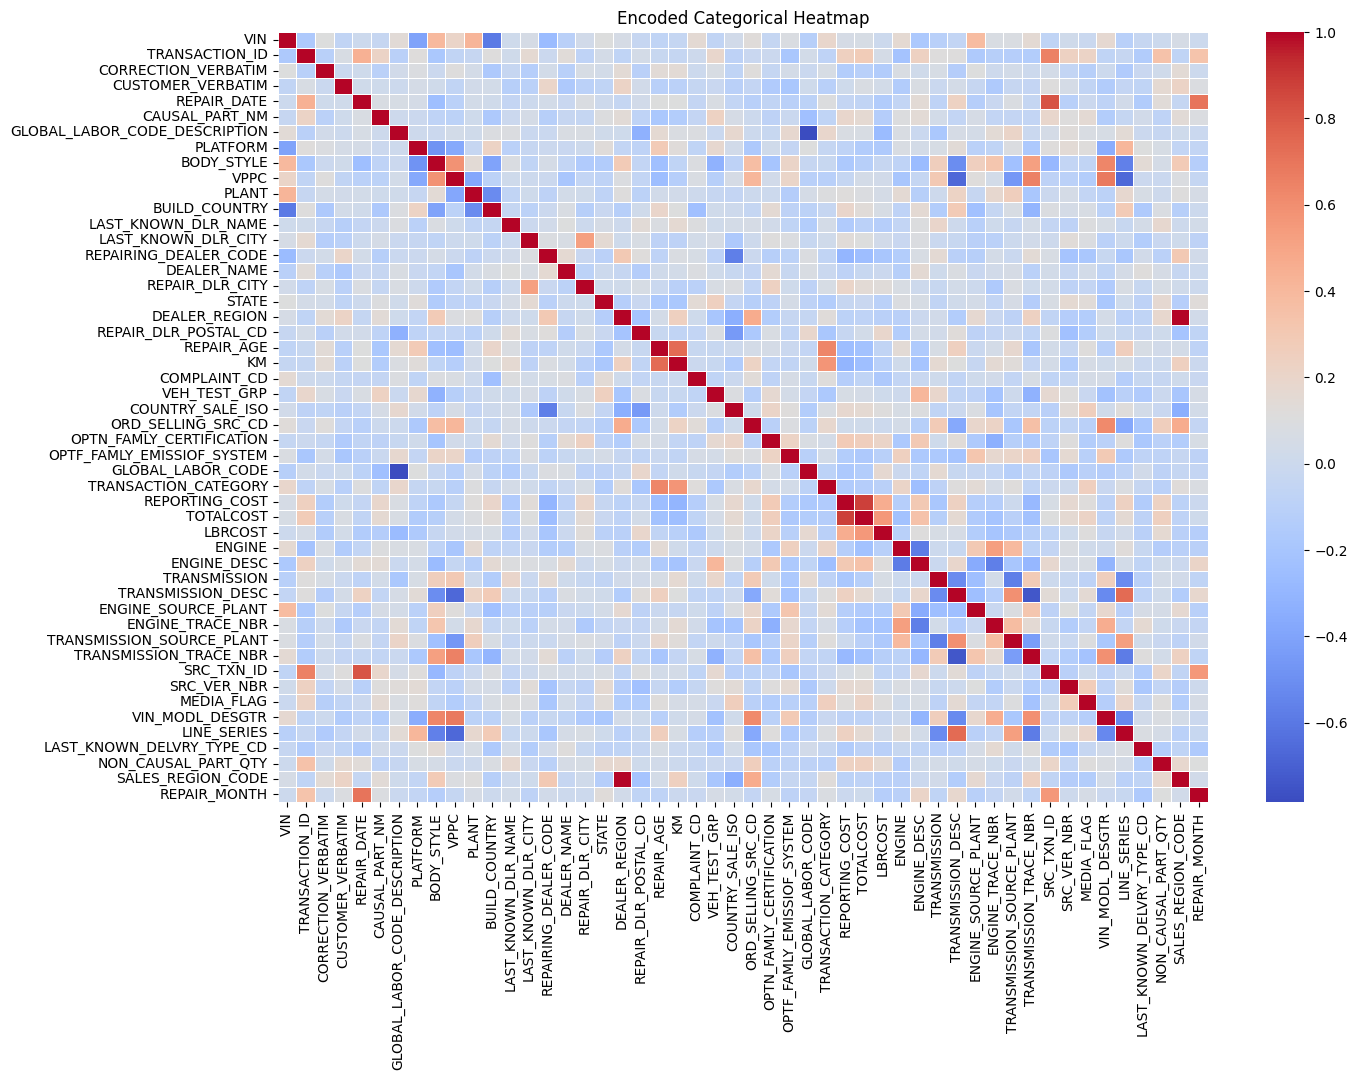

In [56]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le
corr_matrix = df_encoded.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Encoded Categorical Heatmap")
plt.show()

In [57]:
df["VIN"].nunique()

98

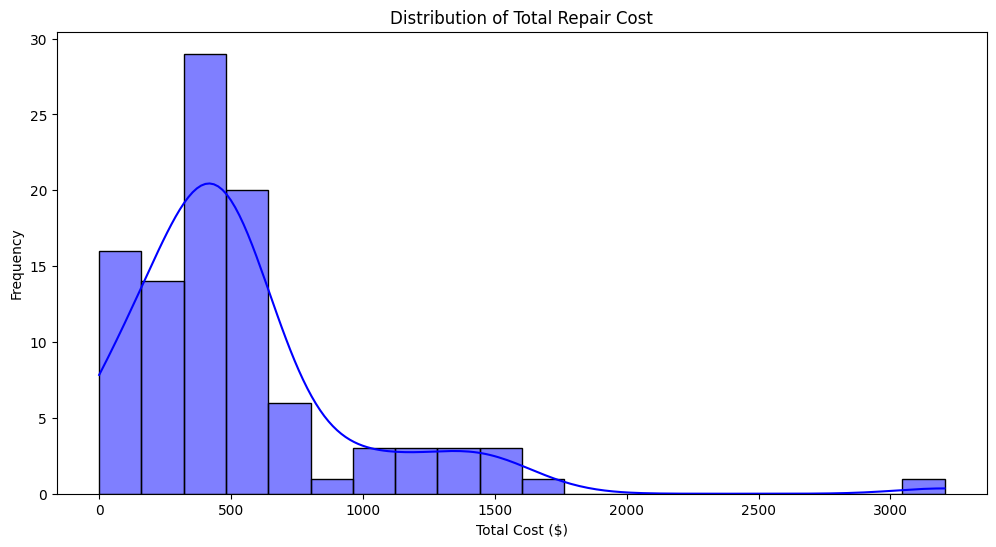

In [58]:
# Selecting top 5 critical columns
critical_columns = ["TOTALCOST", "CAUSAL_PART_NM", "CUSTOMER_VERBATIM", "KM", "GLOBAL_LABOR_CODE_DESCRIPTION"]
df_critical = df[critical_columns]
plt.figure(figsize=(12, 6))
sns.histplot(df_critical["TOTALCOST"], bins=20, kde=True, color="blue")
plt.title("Distribution of Total Repair Cost")
plt.xlabel("Total Cost ($)")
plt.ylabel("Frequency")
plt.show()

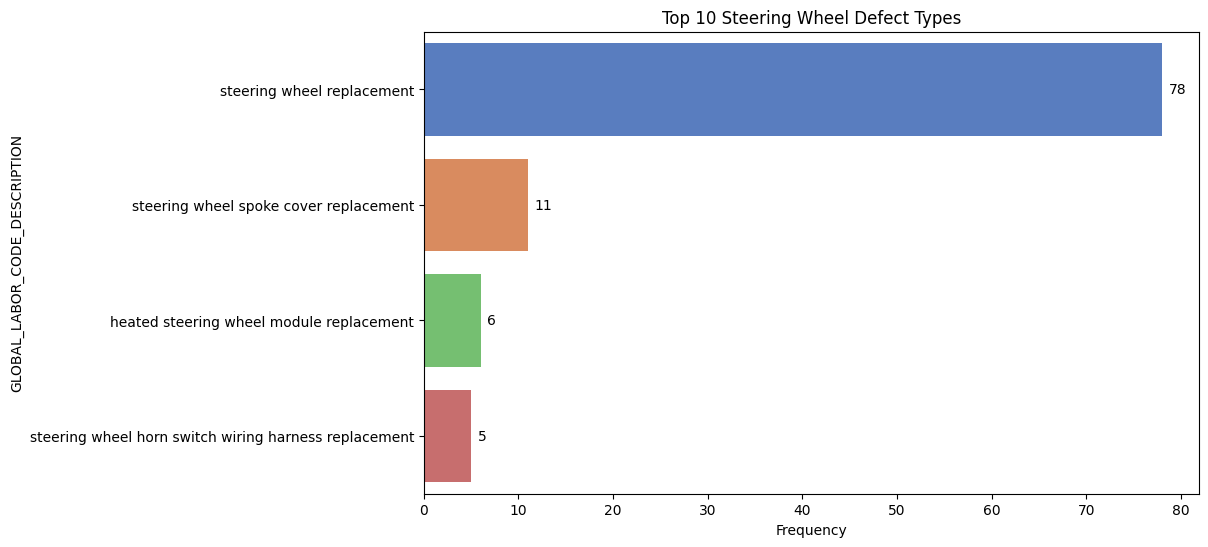

In [59]:
#Top 10 Defect Types
defect_counts = df['GLOBAL_LABOR_CODE_DESCRIPTION'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=defect_counts.values, y=defect_counts.index, palette='muted')
for i, value in enumerate(defect_counts.values):
    plt.annotate(str(value), xy=(value, i), xytext=(5, 0), textcoords='offset points', ha='left', va='center', fontsize=10)

plt.title("Top 10 Steering Wheel Defect Types")
plt.xlabel("Frequency")
plt.show()

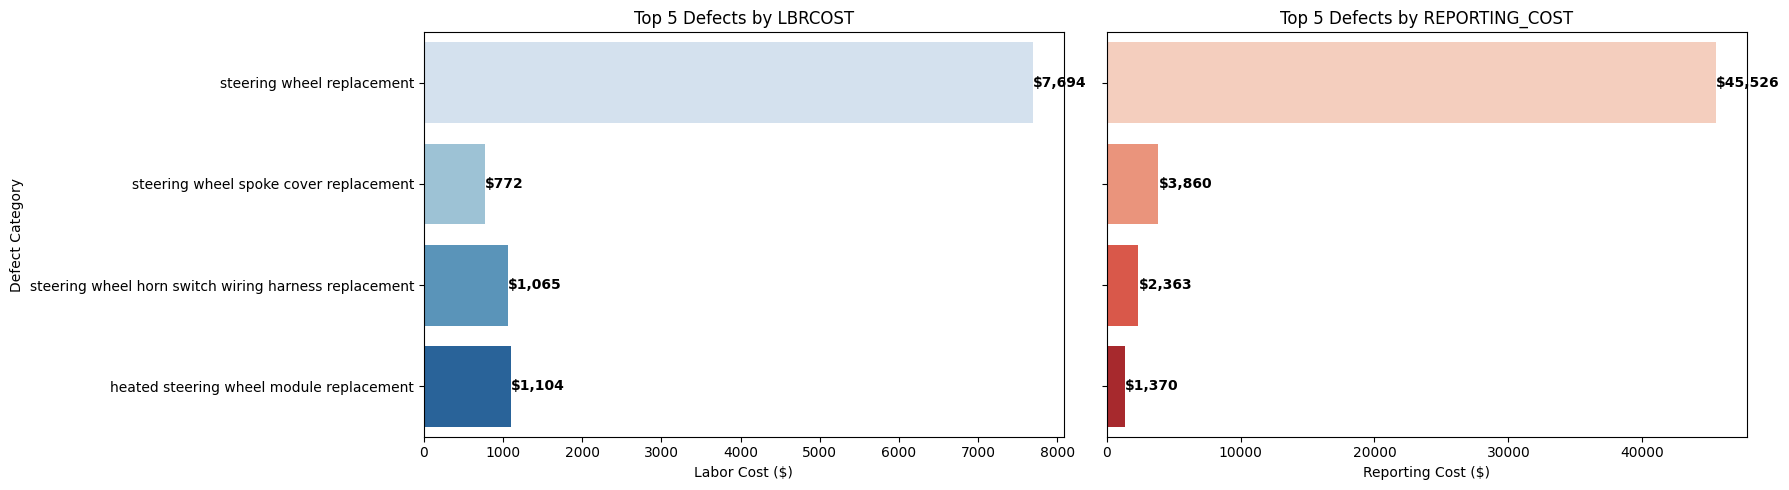

In [60]:
#Cost Analysis by Repair Type
cost_by_defect = df.groupby('GLOBAL_LABOR_CODE_DESCRIPTION')[['LBRCOST', 'REPORTING_COST']].sum()
cost_by_defect = cost_by_defect.nlargest(5, 'REPORTING_COST')
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)
sns.barplot(y=cost_by_defect.index, x=cost_by_defect['LBRCOST'], palette='Blues', ax=axes[0])
axes[0].set_title('Top 5 Defects by LBRCOST')
axes[0].set_xlabel('Labor Cost ($)')
axes[0].set_ylabel('Defect Category')
for p in axes[0].patches:
    axes[0].text(p.get_width(), p.get_y() + p.get_height()/2,
                 f'${p.get_width():,.0f}',
                 ha='left', va='center', fontsize=10, fontweight='bold')
sns.barplot(y=cost_by_defect.index, x=cost_by_defect['REPORTING_COST'], palette='Reds', ax=axes[1])
axes[1].set_title('Top 5 Defects by REPORTING_COST')
axes[1].set_xlabel('Reporting Cost ($)')
axes[1].set_ylabel('')
for p in axes[1].patches:
    axes[1].text(p.get_width(), p.get_y() + p.get_height()/2,
                 f'${p.get_width():,.0f}',
                 ha='left', va='center', fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()


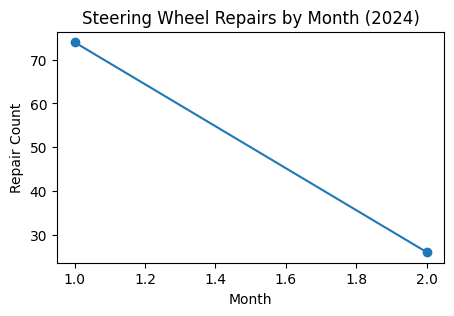

In [61]:
#Defect Trends Over Time
plt.figure(figsize=(5, 3))
monthly_defects = df.groupby('REPAIR_MONTH')['VIN'].count()
plt.plot(monthly_defects.index, monthly_defects.values, marker='o')
plt.title("Steering Wheel Repairs by Month (2024)")
plt.xlabel("Month")
plt.ylabel("Repair Count")
plt.show()

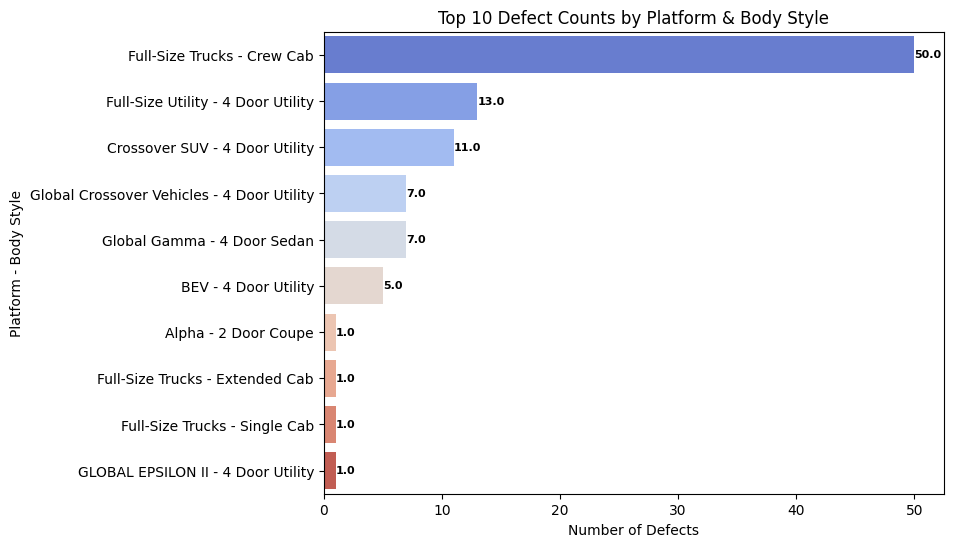

In [62]:
#Defects by Vehicle Model/Body Style
defect_by_model = df.groupby(['PLATFORM', 'BODY_STYLE'])['VIN'].count().reset_index()
defect_by_model = defect_by_model.sort_values(by='VIN', ascending=False).head(10)
defect_by_model['Model'] = defect_by_model['PLATFORM'] + ' - ' + defect_by_model['BODY_STYLE']
plt.figure(figsize=(8, 6))
ax = sns.barplot(y=defect_by_model['Model'], x=defect_by_model['VIN'], palette='coolwarm')
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{p.get_width():,}',
            ha='left', va='center', fontsize=8, fontweight='bold')
plt.xlabel('Number of Defects')
plt.ylabel('Platform - Body Style')
plt.title('Top 10 Defect Counts by Platform & Body Style')
plt.show()


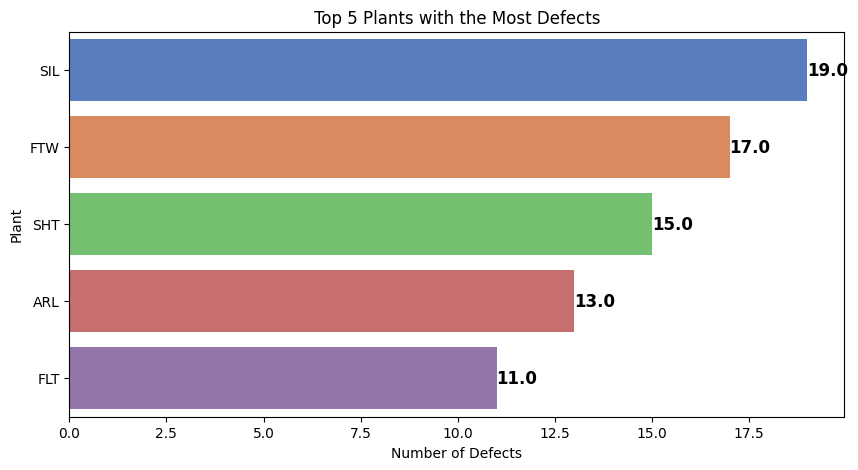

In [63]:
#Defects by Manufacturing Plant
defect_by_plant = df['PLANT'].value_counts().head(5)
plt.figure(figsize=(10, 5))
ax = sns.barplot(y=defect_by_plant.index, x=defect_by_plant.values, palette='muted')
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{p.get_width():,}',
            ha='left', va='center', fontsize=12, fontweight='bold')
plt.xlabel('Number of Defects')
plt.ylabel('Plant')
plt.title('Top 5 Plants with the Most Defects')
plt.show()


In [64]:
#Text Analysis of Customer Complaints
from sklearn.feature_extraction.text import CountVectorizer
text_data = df['CUSTOMER_VERBATIM'].dropna()
vectorizer = CountVectorizer(stop_words='english')
matrix = vectorizer.fit_transform(text_data)
keywords = pd.DataFrame(matrix.toarray(), columns=vectorizer.get_feature_names_out())
top_keywords = keywords.sum().sort_values(ascending=False).head(10)
print("Top Complaint Keywords:\n", top_keywords)

Top Complaint Keywords:
 steering    100
wheel       100
states       58
customer     56
coming       25
heated       19
sop          18
advise       14
apart        13
check        11
dtype: int64


**EDA Process for gaining the insights and patterns**

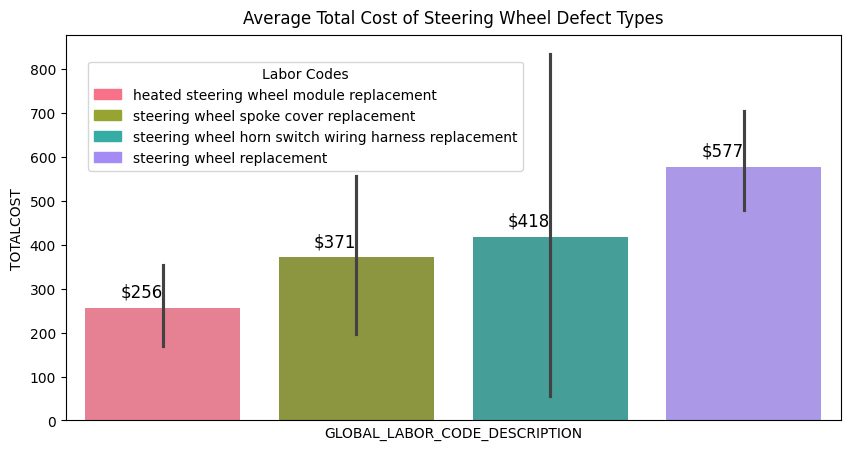

In [65]:
mean_costs = df.groupby("GLOBAL_LABOR_CODE_DESCRIPTION")["TOTALCOST"].mean().reset_index()
mean_costs = mean_costs.sort_values("TOTALCOST")
colors = sns.color_palette("husl", len(mean_costs))
plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x="GLOBAL_LABOR_CODE_DESCRIPTION", y="TOTALCOST", data=df,
                       order=mean_costs["GLOBAL_LABOR_CODE_DESCRIPTION"], palette=colors)
for p in bar_plot.patches:
    rounded_value = round(p.get_height())
    bar_plot.annotate(f'${rounded_value:,}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='right', va='bottom', fontsize=12, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')
# Set titles and labels
plt.title("Average Total Cost of Steering Wheel Defect Types", fontsize=12, va="bottom")
plt.xticks([])
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels = mean_costs["GLOBAL_LABOR_CODE_DESCRIPTION"].tolist()
plt.legend(handles, labels, title="Labor Codes", loc='upper left', bbox_to_anchor=(0.02, 0.95))
plt.show()


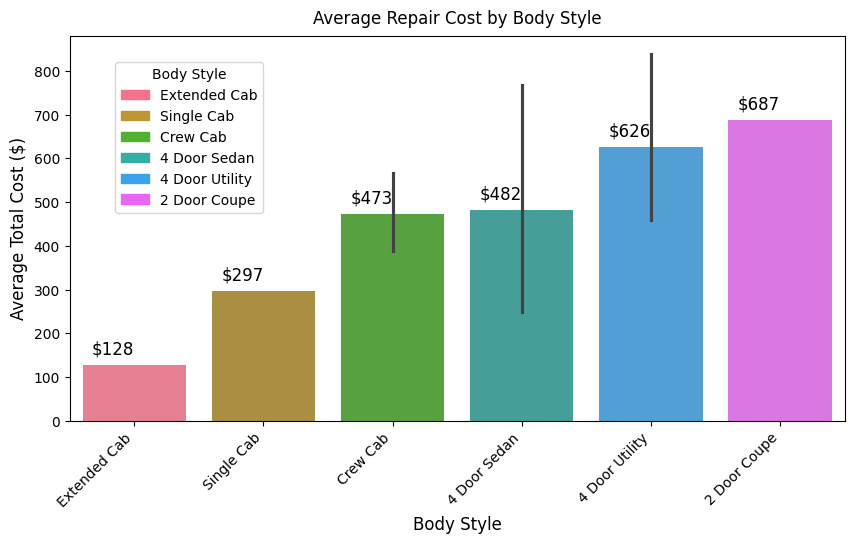

In [66]:
#calculating Average Repair Cost by Body Style
mean_costs = df.groupby("BODY_STYLE")["TOTALCOST"].mean().reset_index()
mean_costs = mean_costs.sort_values("TOTALCOST")
colors = sns.color_palette("husl", len(mean_costs))
plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x="BODY_STYLE", y="TOTALCOST", data=df,
                       order=mean_costs["BODY_STYLE"], palette=colors,
                       edgecolor='none')
for p in bar_plot.patches:
    rounded_value = round(p.get_height())
    bar_plot.annotate(f'${rounded_value:,}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='right', va='bottom', fontsize=12, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')
plt.title("Average Repair Cost by Body Style", fontsize=12, va="bottom")
plt.xlabel("Body Style", fontsize=12)
plt.ylabel("Average Total Cost ($)", fontsize=12)
plt.xticks(rotation=45, ha='right')
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels = mean_costs["BODY_STYLE"].tolist()
plt.legend(handles, labels, title="Body Style", loc='upper left', bbox_to_anchor=(0.05, 0.95))
plt.show()


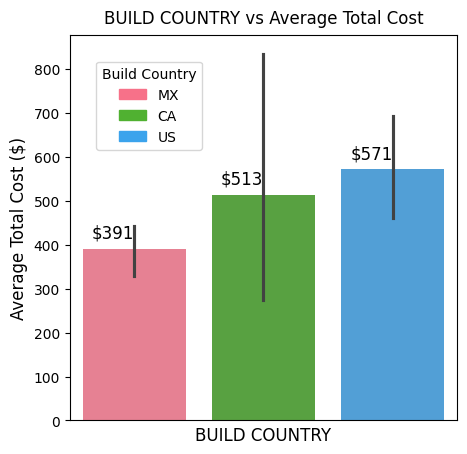

In [67]:
#calculating Average Total Cost by BUILD COUNTRY

mean_costs = df.groupby("BUILD_COUNTRY")["TOTALCOST"].mean().reset_index()
mean_costs = mean_costs.sort_values("TOTALCOST")
colors = sns.color_palette("husl", len(mean_costs))
plt.figure(figsize=(5, 5))
bar_plot = sns.barplot(x="BUILD_COUNTRY", y="TOTALCOST", data=df,
                       order=mean_costs["BUILD_COUNTRY"], palette=colors,
                       edgecolor='none')
for p in bar_plot.patches:
    rounded_value = round(p.get_height())
    bar_plot.annotate(f'${rounded_value:,}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='right', va='bottom', fontsize=12, color='black',
                      xytext=(0, 5),
                      textcoords='offset points')
# Set titles and labels
plt.title("BUILD COUNTRY vs Average Total Cost", fontsize=12, va="bottom")
plt.xlabel("BUILD COUNTRY", fontsize=12)
plt.ylabel("Average Total Cost ($)", fontsize=12)
plt.xticks([])
handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
labels = mean_costs["BUILD_COUNTRY"].tolist()
plt.legend(handles, labels, title="Build Country", loc='upper left', bbox_to_anchor=(0.05, 0.95))
plt.show()


Text(13.819444444444445, 0.5, 'No. of Aging')

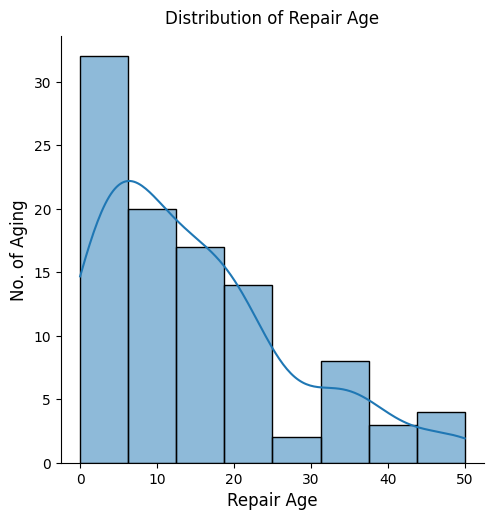

In [68]:
#plotting Distribution of Repair Age
sns.displot(df, x="REPAIR_AGE", kde=True)
# Set titles and labels
plt.title("Distribution of Repair Age", fontsize=12, va="bottom")
plt.xlabel("Repair Age", fontsize=12)
plt.ylabel("No. of Aging", fontsize=12)

Text(13.819444444444445, 0.5, 'Count of Complaint_CD')

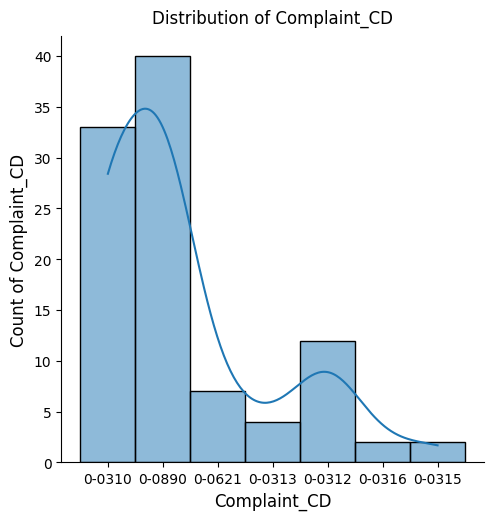

In [69]:
#plotting Distribution of Complaint_CD
sns.displot(df, x="COMPLAINT_CD", kde=True)
# Set titles and labels
plt.title("Distribution of Complaint_CD", fontsize=12, va="bottom")
plt.xlabel("Complaint_CD", fontsize=12)
plt.ylabel("Count of Complaint_CD", fontsize=12)

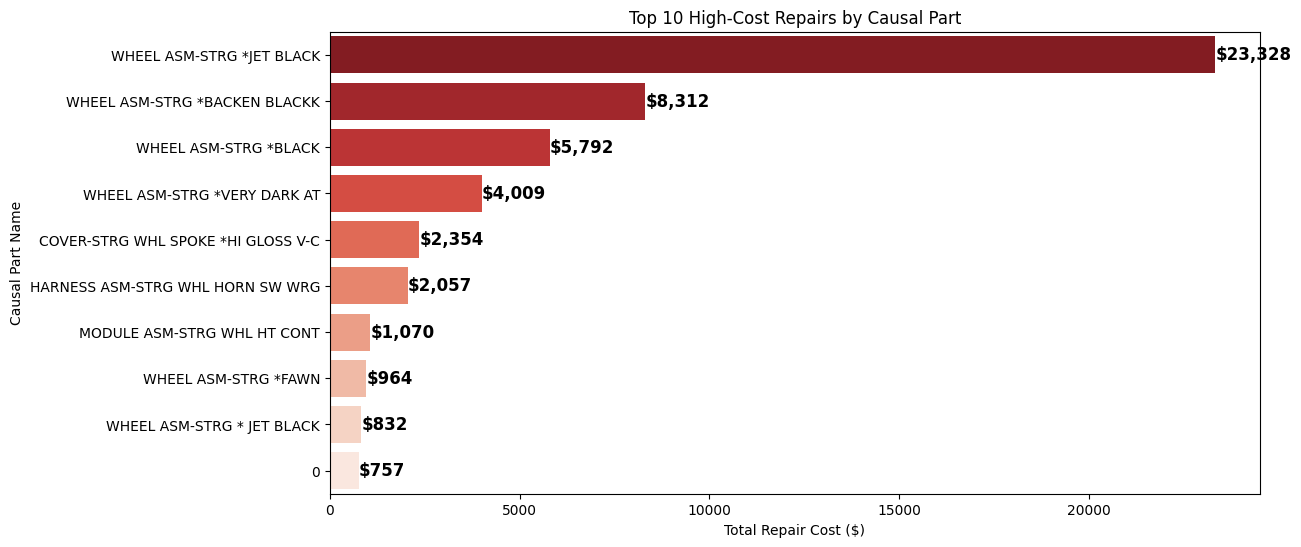

In [70]:
#Visualising of Identifying High-Cost Repairs
high_cost_repairs = df[['CAUSAL_PART_NM', 'TOTALCOST']].groupby('CAUSAL_PART_NM').sum()
high_cost_repairs = high_cost_repairs.sort_values(by='TOTALCOST', ascending=False).head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(y=high_cost_repairs.index, x=high_cost_repairs['TOTALCOST'], palette='Reds_r')
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'${p.get_width():,.0f}',
            ha='left', va='center', fontsize=12, fontweight='bold')
plt.xlabel('Total Repair Cost ($)')
plt.ylabel('Causal Part Name')
plt.title('Top 10 High-Cost Repairs by Causal Part')

plt.show()


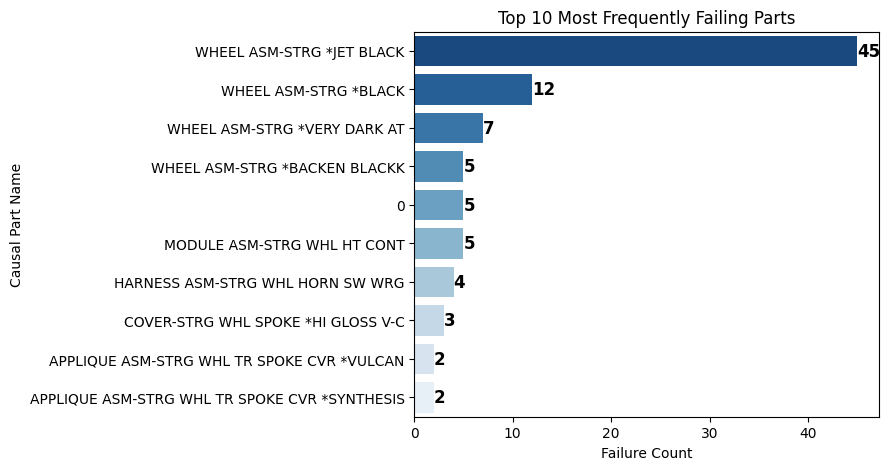

In [71]:
#Finding Frequently Failing Parts
frequent_failures = df['CAUSAL_PART_NM'].value_counts().head(10)
plt.figure(figsize=(6, 5))
ax = sns.barplot(y=frequent_failures.index, x=frequent_failures.values, palette='Blues_r')
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{int(p.get_width()):,}',
            ha='left', va='center', fontsize=12, fontweight='bold')
plt.xlabel('Failure Count')
plt.ylabel('Causal Part Name')
plt.title('Top 10 Most Frequently Failing Parts')
plt.show()


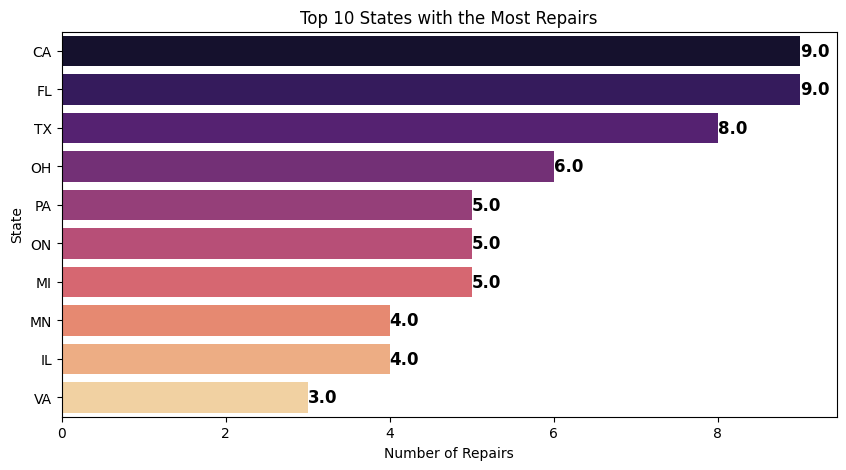

In [72]:
#Regional Repair Trends
regional_repairs = df.groupby('STATE')['TRANSACTION_ID'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
ax = sns.barplot(y=regional_repairs.index, x=regional_repairs.values, palette='magma')
for p in ax.patches:
    ax.text(p.get_width(), p.get_y() + p.get_height() / 2, f'{p.get_width():,}',
            ha='left', va='center', fontsize=12, fontweight='bold')
plt.xlabel('Number of Repairs')
plt.ylabel('State')
plt.title('Top 10 States with the Most Repairs')
plt.show()

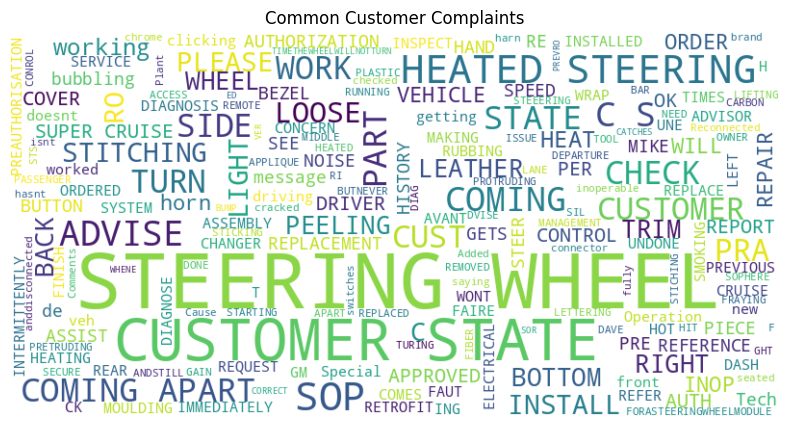

In [73]:
#Customer Complaint Text Analysis
text = " ".join(df['CUSTOMER_VERBATIM'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Customer Complaints")
plt.show()

**Feature Insights & Tagged Data**

In [74]:
# Select text-based columns for analysis
text_columns = ["CORRECTION_VERBATIM", "CUSTOMER_VERBATIM"]

# Fill missing values with an empty string
df[text_columns] = df[text_columns].fillna("")

In [75]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    text = text.strip()  # Remove leading/trailing spaces
    return text

# Apply cleaning
for col in text_columns:
    df[col] = df[col].apply(clean_text)

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all text data into a single corpus
corpus = df["CORRECTION_VERBATIM"].tolist() + df["CUSTOMER_VERBATIM"].tolist()

# Apply TF-IDF
vectorizer = TfidfVectorizer(max_features=100, stop_words="english")
tfidf_matrix = vectorizer.fit_transform(corpus)

# Extract top keywords
keywords = vectorizer.get_feature_names_out()
print("Extracted Keywords:", keywords)

Extracted Keywords: ['accessed' 'advise' 'air' 'apart' 'approved' 'assembly' 'assistance'
 'auth' 'authorization' 'bag' 'case' 'check' 'checked' 'circuit' 'clear'
 'code' 'codes' 'coming' 'concern' 'confirmed' 'control' 'cover' 'cruise'
 'cs' 'cust' 'customer' 'customers' 'designed' 'diag' 'diagnose'
 'diagnosis' 'does' 'drive' 'dtc' 'dtcs' 'gm' 'harness' 'heat' 'heated'
 'heater' 'horn' 'id' 'inop' 'install' 'installed' 'issue' 'labor'
 'leather' 'light' 'loose' 'message' 'module' 'new' 'ok' 'op' 'open'
 'operating' 'operation' 'order' 'ordered' 'parts' 'peeling' 'performed'
 'piece' 'pra' 'pre' 'programming' 'rear' 'remove' 'removed' 'repair'
 'replace' 'replaced' 'replacement' 'right' 'ro' 'service' 'sop' 'spoke'
 'states' 'steering' 'steeringwheel' 'stitching' 'super' 'switch' 'tcsc'
 'tech' 'test' 'tested' 'time' 'times' 'trim' 'turn' 'turns' 'vehicle'
 'verified' 'warranty' 'wheel' 'work' 'working']


In [77]:
from fuzzywuzzy import process

# Define predefined failure conditions and components
failure_conditions = [ "Wheel Failure", "Wheel Alignment", "Wheel Noise", "Wheel Vibration", "Steering Wheel Binding", "Steering Wheel Stiffness", "Steering Wheel Noise",
"wheel play", "wheel vibration", "wheel stiffness", "wheel binding", "wheel noise", "Column Problems",
"column failure", "column lock malfunction", "column noise", "column tilt failure", "column wiring issues",
"Gear Failures", "rack and pinion failure", "gear leakage", "gear binding", "worn steering gear", "gear misalignment",
"Power Steering Failures", "power steering pump failure", "power steering fluid leak", "power steering fluid contamination", "power assist failure",
"power steering noise", "Steering Linkage Failures", "tie rod end wear", "drag link failure", "pitman arm wear", "idler arm failure", "linkage misalignment",
"Steering Rack Issues", "steering rack leakage", "worn steering rack bushings", "steering rack noise", "electric steering rack failure", "hydraulic steering rack failure",
"Wheel Alignment Problems", "misaligned wheels", "uneven tire wear", "pulling to one side", "steering drift", "camber issues", "Suspension Component Failures",
"worn control arms", "ball joint failure", "sway bar link failure", "strut failure", "shock absorber failure", "General Steering System Failures",
"loss of steering control", "ystem warning lights", "fluid contamination", "system overheating","system noise"]

components = ["Engine", "Transmission", "Battery", "Fuel Pump", "Radiator", "Alternator", "steering wheel lock", "steering wheel adapter",
"steering column assembly", "steering column cover", "steering column ignition switch", "steering column bearing", "tilt steering column", "rack and pinion steering",
"steering gear box", "power steering gear", "steering gear assembly", "steering gear adjustment", "tie rod ends", "drag link", "pitman arm", "idler arm",
"steering knuckle", "power steering pump", "power steering fluid", "power steering hoses", "power steering reservoir", "power steering belt", "Steering Rack",
"steering rack assembly", "steering rack bushings", "steering rack boots", "electric steering rack", "hydraulic steering rack", "Wheel Alignment", "alignment kits",
"camber adjustment", "toe adjustment", "caster adjustment", "wheel alignment tools", "Suspension Components", "control arms", "ball joints", "sway bar links",
"strut assemblies","shock absorbers"]

def tag_text(text, categories):
    match, score = process.extractOne(text, categories)
    return match if score > 70 else "steering problem"

# Generate tags for failure conditions and components
df["Failure_Tag"] = df["CORRECTION_VERBATIM"].apply(lambda x: tag_text(x, failure_conditions))
df["Component_Tag"] = df["CORRECTION_VERBATIM"].apply(lambda x: tag_text(x, components))

# Display tagged data
df[["CORRECTION_VERBATIM", "Failure_Tag", "Component_Tag"]].head(10)


,CORRECTION_VERBATIM,Failure_Tag,Component_Tag
0,replaced steering wheel now okay,Wheel Failure,steering wheel lock
1,checked found dtc s u u set in bcm found pipj ...,steering problem,steering problem
2,approved olh for added diagnostics with tcsc t...,steering problem,steering problem
3,steering wheel replacement,Wheel Failure,steering gear box
4,replaced steering message no longer displayed,Steering Wheel Binding,steering wheel lock
5,remove and replace steering wheel wire harness,Wheel Failure,steering wheel lock
6,accessed removed and replaced the drivers assi...,steering problem,steering problem
7,replaced steering wheel,Wheel Failure,Steering Rack
8,technician found the steering column plastic t...,Steering Wheel Binding,steering wheel lock
9,steering wheel replacement,Wheel Failure,steering gear box


In [78]:
df.to_excel("Tagged_Data.xlsx", index=False)